In [83]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('text', usetex=False)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [84]:
ens = pd.read_csv('../ensembl.tsv', sep='\t')
pqm1_50 = pd.read_csv('../data/diff_exp/DE_pqm1_50.csv', index_col=0)
pqm1_50 = pqm1_50.join(ens.set_index('ensembl_gene_id').drop(columns='ensembl_transcript_id').drop_duplicates())
pqm1_50['sig'] = pqm1_50.padj < 0.05
res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
res.head()

,baseMean50,log2FoldChange50,lfcSE50,stat50,pvalue50,padj50,genename50,logq50,baseMean58,log2FoldChange58,...,Size,SignAt50,SignAt58,Sign,Significance,Ratio,Above,MinCountsDetected,logBM50,logBM58
WBGene00000001,1825.992548,0.003058,0.043753,0.069886,0.944284,0.980258,aap-1,0.008660,3400.139465,0.096256,...,2350.0,Positive,Positive,Same,DE at 58hrs,31.479326,False,62.272067,3.261499,3.531497
WBGene00000002,137.951136,-0.029871,0.168175,-0.177619,0.859023,0.951061,aat-1,0.021792,104.370933,-0.092565,...,2709.0,Negative,Negative,Same,Not DE,3.098813,False,1.786811,2.139725,2.018580
WBGene00000003,329.481576,0.239563,0.099018,2.419377,0.015547,0.094763,aat-2,1.023362,209.054068,-0.298932,...,1958.0,Positive,Negative,Different,DE at 58hrs,-1.247822,False,4.110564,2.517831,2.320259
WBGene00000004,319.879951,-0.135582,0.099034,-1.369046,0.170985,0.444537,aat-3,0.352092,663.533112,-0.076377,...,5290.0,Negative,Negative,Same,Not DE,0.563330,False,9.975762,2.504987,2.821863
WBGene00000005,200.963873,0.345158,0.126934,2.719196,0.006544,0.048988,aat-4,1.309910,272.824633,0.113027,...,3184.0,Positive,Positive,Same,DE at 50hrs,0.327466,False,3.992007,2.303118,2.435884


In [85]:
(pqm1_50.padj < 0.05).sum()

10068

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='log2FoldChange', ylabel='logq'>

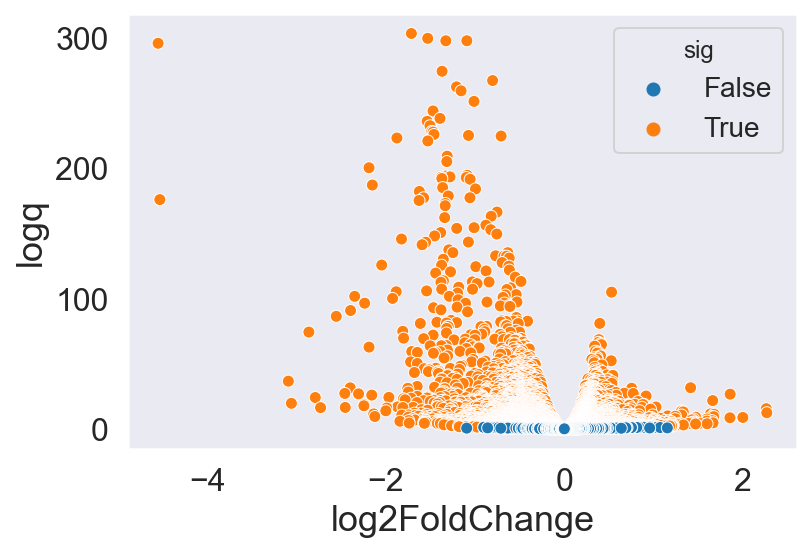

In [86]:
sns.scatterplot('log2FoldChange', 'logq', hue='sig', data=pqm1_50)

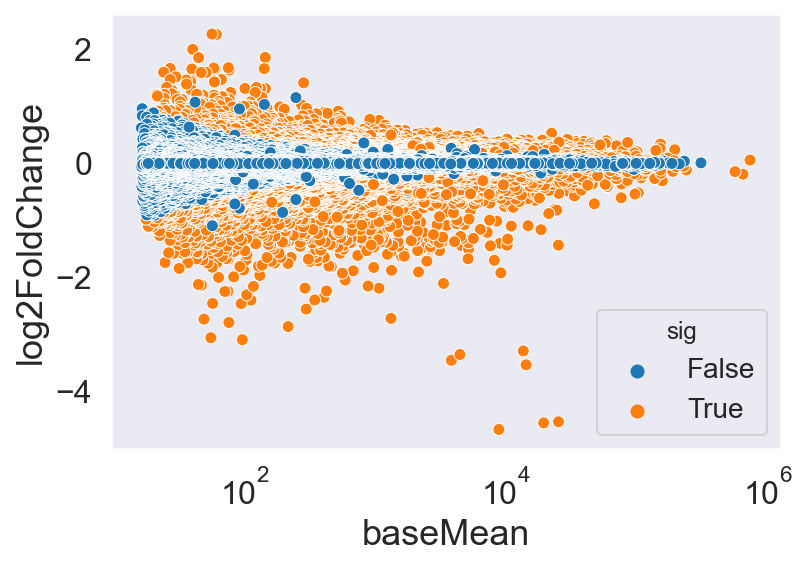

In [87]:
sns.scatterplot(x='baseMean', y='log2FoldChange', hue='sig', data=pqm1_50)
plt.xscale('log')

In [88]:
res = res.join(pqm1_50, rsuffix='_pqm1')

In [89]:
res.Significance

WBGene00000001    DE at 58hrs
WBGene00000002         Not DE
WBGene00000003    DE at 58hrs
WBGene00000004         Not DE
WBGene00000005    DE at 50hrs
                     ...     
WBGene00303105         Not DE
WBGene00303208         Not DE
WBGene00303231         Not DE
WBGene00303423         Not DE
WBGene00304189         Not DE
Name: Significance, Length: 12244, dtype: object

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='log2FoldChange50', ylabel='log2FoldChange'>

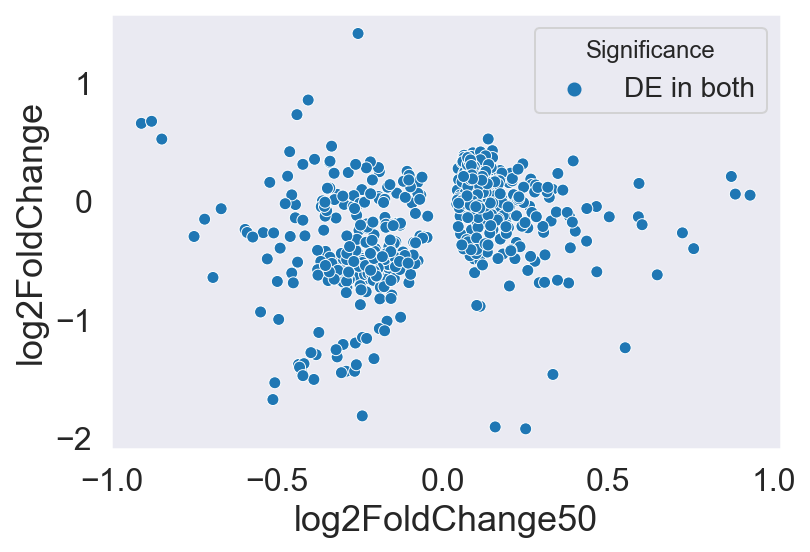

In [97]:
sns.scatterplot('log2FoldChange50', 'log2FoldChange', hue='Significance', data=res[(res.Significance == 'DE in both')].sort_values('Significance', ascending=True))#, palette=["black", 'red'])i

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='log2FoldChange50', ylabel='log2FoldChange58'>

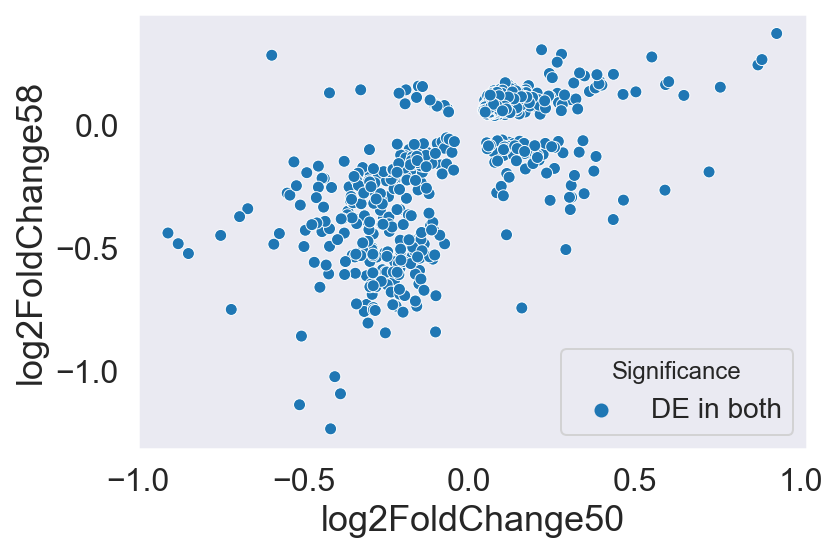

In [96]:
sns.scatterplot('log2FoldChange50', 'log2FoldChange58', hue='Significance', data=res[(res.Significance == 'DE in both')].sort_values('Significance', ascending=True))#, palette=["black", 'red'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

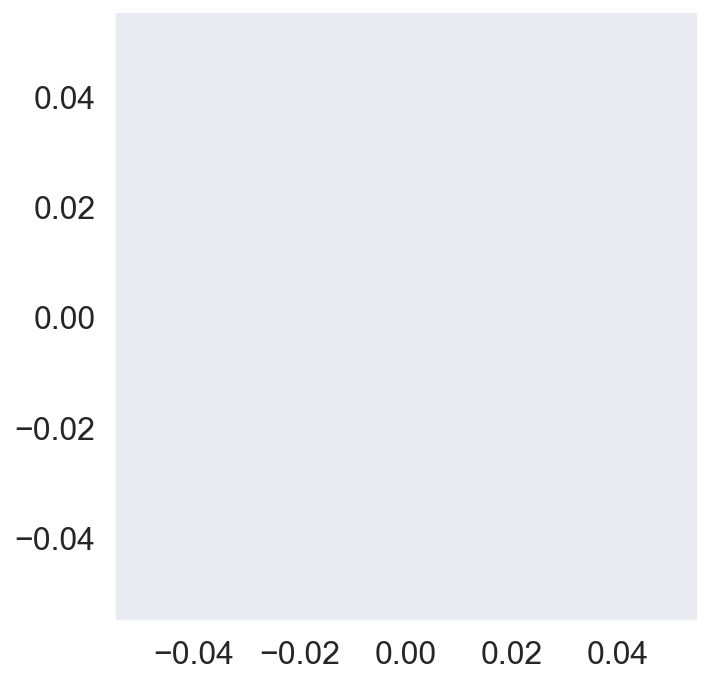

In [82]:
sns.relplot(
    data=res[res.Significance != "Not Sig"].dropna(),
    x="log2FoldChange50", y="log2FoldChange58",
    size='logq58',
    kind="scatter", sizes=(25, 300), hue='Significance',
    palette=['black', 'tab:red'], hue_order=['Same', 'Different'],
    alpha=0.1
)

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='log2FoldChange50', ylabel='log2FoldChange58'>

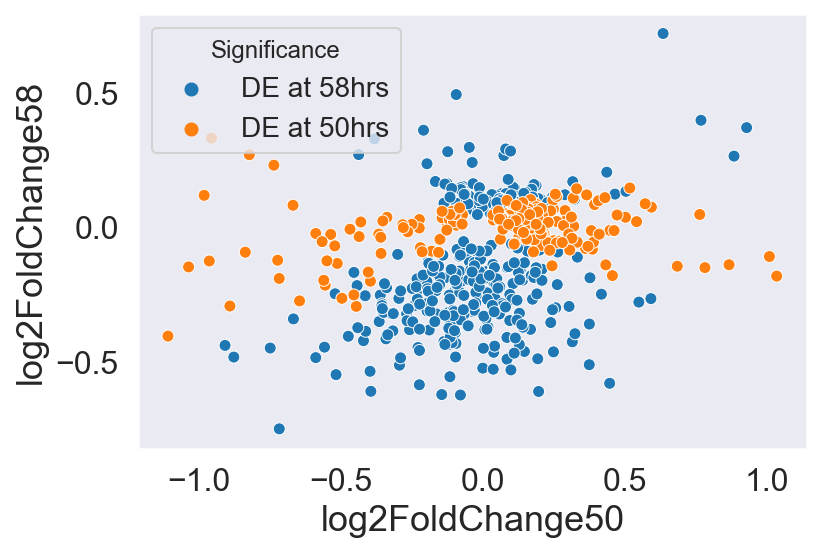

In [65]:
sns.scatterplot('log2FoldChange50', 'log2FoldChange58', hue='Significance',
                data=res[(res.sig < 0.05) & (res.Significance != 'Not Sig')].sort_values('Significance', ascending=False))#, palette=["black", 'red'])

array(['DE at 58hrs', 'Not Sig', 'DE at 50hrs'], dtype=object)